<a href="https://colab.research.google.com/github/DallasAutumn/datawhale_salons/blob/master/PyTorch_s8_task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch-s8-task6 优化器

#epoch 0 ...
#epoch 1 ...
#epoch 2 ...
#epoch 3 ...
#epoch 4 ...
#epoch 5 ...
#epoch 6 ...
#epoch 7 ...
#epoch 8 ...
#epoch 9 ...
#epoch 10 ...
#epoch 11 ...


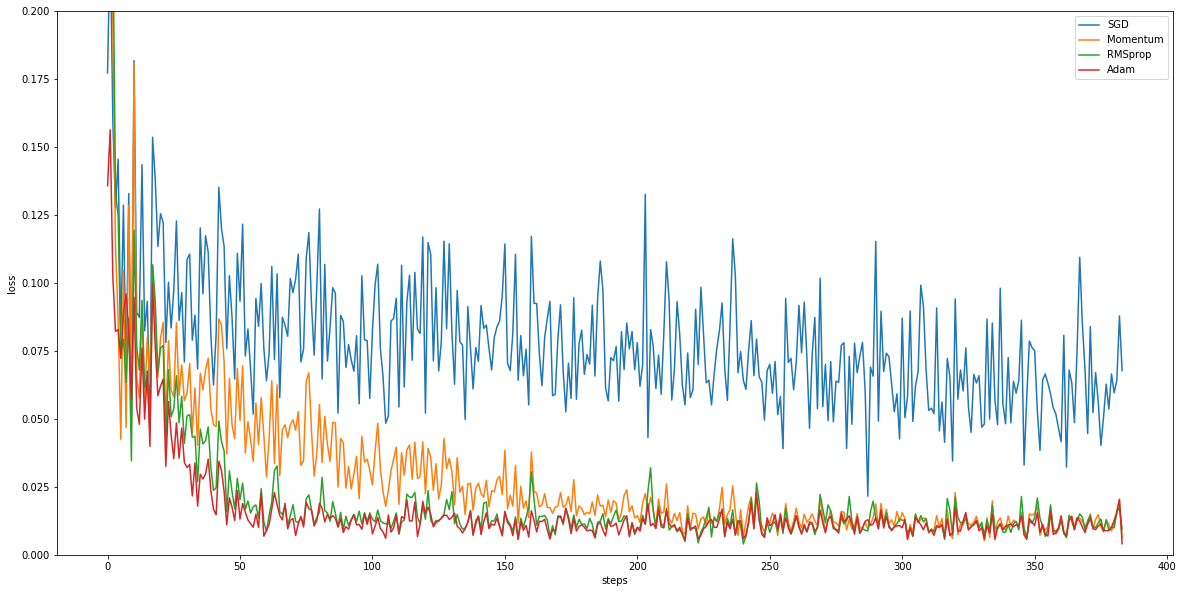

In [2]:
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# global settings
plt.rcParams['figure.figsize'] = (20, 10)

# hyper params
LR = 0.01
BATCH_SIZE = 32
EPOCHS = 12

x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(x.size()))

# plot dataset
# plt.scatter(x.numpy(), y.numpy())
# plt.show()

torch_dataset = TensorDataset(x, y)
loader = DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# default network
class Net(nn.Module):
    def __init__(self):
         super(Net, self).__init__()
         self.hidden = nn.Linear(1, 20)
         self.predict = nn.Linear(20, 1)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

opt_SGD = optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = nn.MSELoss()
losses = [[], [], [], []]

for epoch in range(EPOCHS):
    print(f"#epoch {epoch} ...")

    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        for net, opt, loss_lis in zip(nets, optimizers, losses):
            output = net(b_x)
            loss = loss_func(output, b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            loss_lis.append(loss.item())

# visualization
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, loss_lis in enumerate(losses):
    plt.plot(loss_lis, label=labels[i])
plt.legend(loc='best')
plt.xlabel('steps')
plt.ylabel('loss')
plt.ylim((0, 0.2))
plt.show()